# FaceBook Data Exploration

In [1]:
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing

In [58]:
fb_data_df = pd.read_csv('pseudo_facebook.csv')
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [59]:
fb_data_df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [60]:
fb_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [61]:
# check for missing values
fb_data_df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [62]:
# there are 177 rows having either gender  or tenure missing, thats 0.1 % of total data
# as missing data is very small part of total data we can drop those rows directly
fb_data_df.dropna(how = 'any', inplace = True)

In [63]:
# now check data types of columns (fields) 
fb_data_df.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

In [64]:
# only change needed is to take tenure as int
fb_data_df ['tenure'] = fb_data_df['tenure'].astype('int')

# Age group analysis

In [65]:
min(fb_data_df['age']), max(fb_data_df['age'])

(13, 113)

In [66]:
# min age is 13 and max is 113 so we will take 10 as lowerbound and 120 as upperbound for creating age groups
lables = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
fb_data_df['age_group'] = pd.cut(fb_data_df['age'], bins = np.arange(10, 121, 10), labels = lables, right=True)
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20


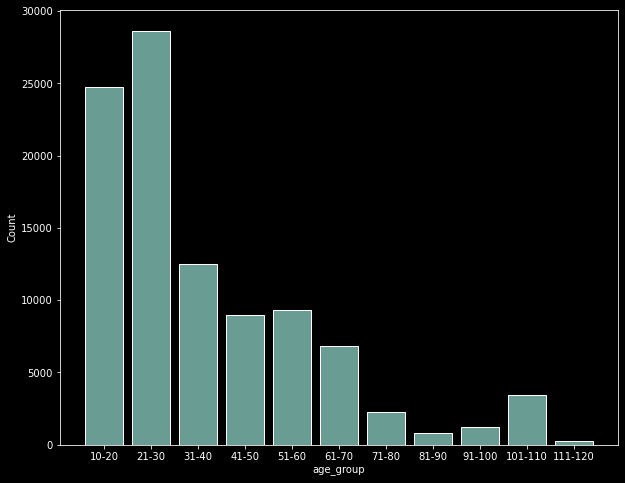

In [67]:
# age group vs count histogram
plt.subplots(figsize = (10,8))
sns.histplot(fb_data_df, x = 'age_group', multiple="dodge", shrink = 0.8)
plt.show()

Looking at above plot we can say that majority of user base is between age group 10 - 40.

<AxesSubplot:xlabel='age', ylabel='count'>

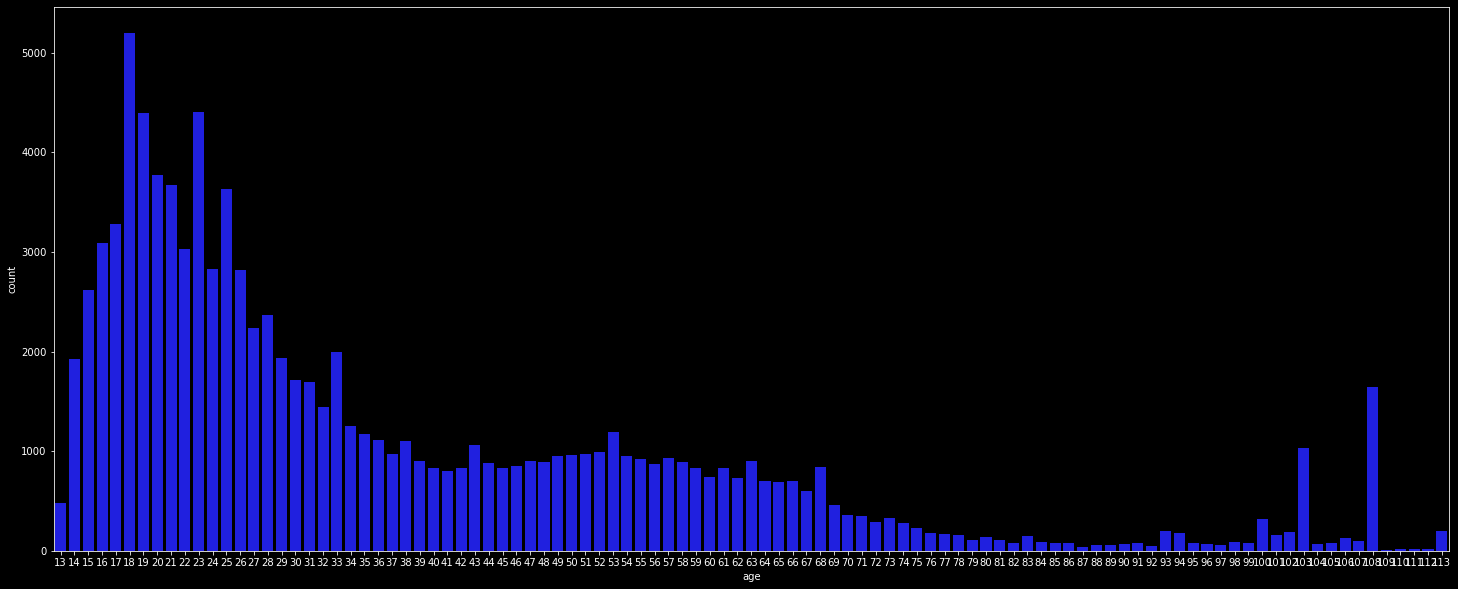

In [68]:
plt.figure(figsize=(25,10))
sns.countplot(x='age',data=fb_data_df,color='blue')

# Gender wise analysis

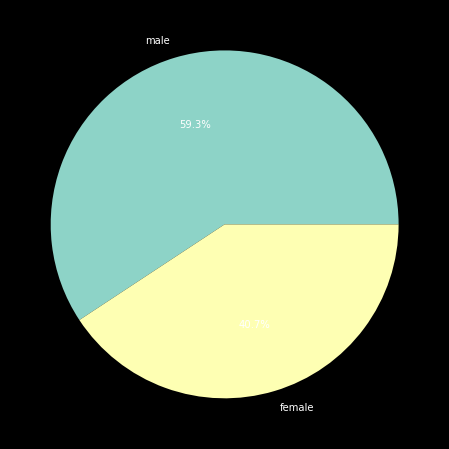

In [69]:
# male female count
gender_counts = fb_data_df['gender'].value_counts()
plt.subplots(figsize=(10,8))
plt.pie(gender_counts, labels = ['male','female'], autopct='%1.1f%%')
plt.show()


Based on above plot we can say that there are more mail users than female users

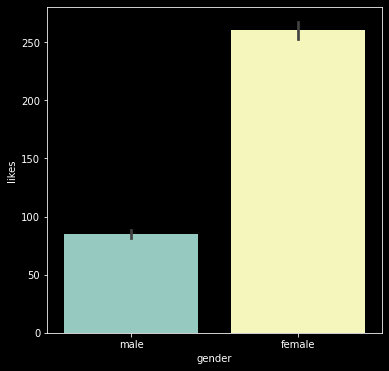

In [70]:
# likes  count vs age group and gender
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'likes')
plt.show()

As we have seen count of female users is less than male users, but looking at like counts we can say that female users are more active than male users.

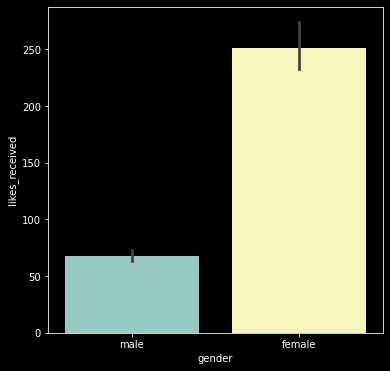

In [71]:
# likes_recieved vs gender  
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'likes_received')
plt.show()

Looking at above plot, we can say that generelly content posted by female users is more liked. 

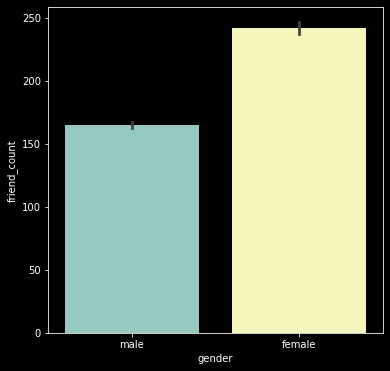

In [72]:
# friend  count vs age groupu and gender
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'friend_count')
plt.show()

<AxesSubplot:xlabel='age_group', ylabel='friend_count'>

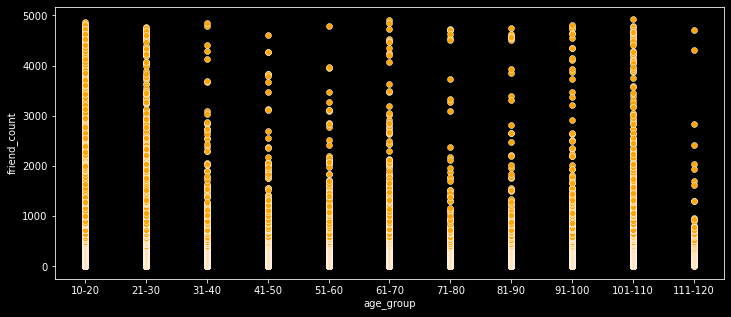

In [73]:
#Which age group has highest friend count?
plt.figure(figsize=(12,5))
sns.scatterplot(x='age_group',y='friend_count',data=fb_data_df,color='orange')

In [74]:
#Who has the highest friend count?
fb_data_df[fb_data_df['friend_count']==fb_data_df['friend_count'].max()][['age','gender','friend_count']]

,age,gender,friend_count
98159,103,female,4923


Female user have more friends than male users

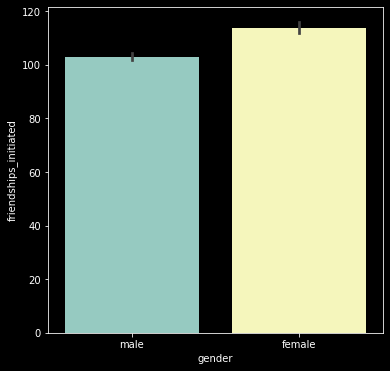

In [75]:
# friendships_initiated vs age group and gender
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'friendships_initiated')
plt.show()

From above plot we can see that, female users do send out more friend requests than male users but there is not much difference.

<AxesSubplot:xlabel='age_group', ylabel='likes_received'>

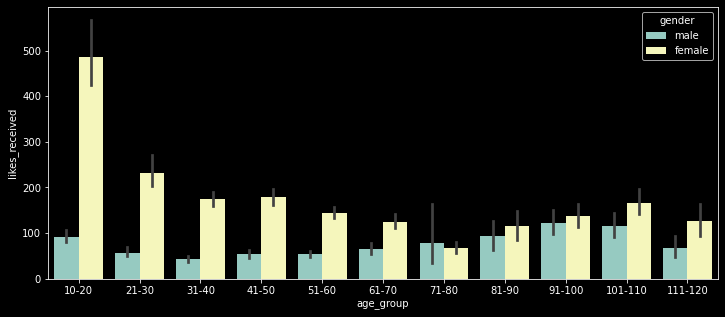

In [51]:
plt.figure(figsize=(12,5))
sns.barplot(x='age_group',y='likes_received',data=fb_data_df,hue='gender')

# Tenure analysis

In [76]:
lables = ['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
fb_data_df['year_group'] = pd.cut(fb_data_df['tenure'], bins = np.arange(-1, 3285 + 1, 365), labels =lables)
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20,0-1 year


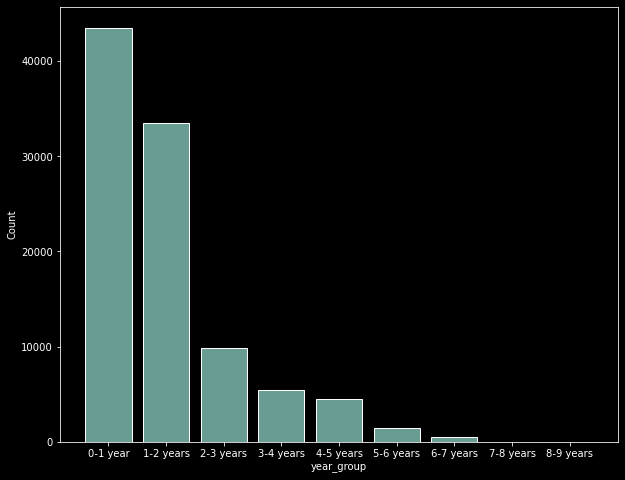

In [77]:
# year group histogram
plt.subplots(figsize = (10,8))
sns.histplot(data = fb_data_df,x = 'year_group', multiple = 'dodge', shrink = 0.8)
plt.show()

From above plot we can see that; majority of user remain on platform or app for around 0 –1 year after which user count drops by 10 % followed by much steeper decrease in user count. Also, we can see that after 5 years on platform most all users stop using platform and look for alternative.

# Active users and inactive user analysis


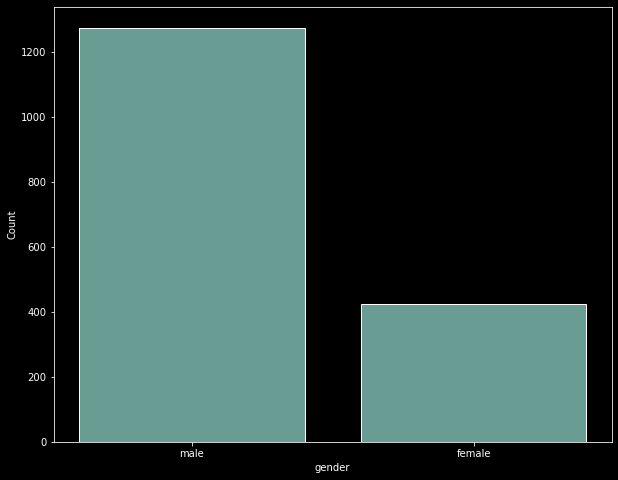

In [78]:
inactive_users = fb_data_df.query('friend_count == 0 and friendships_initiated == 0 and likes == 0')
plt.subplots(figsize = (10,8))
sns.histplot(data = inactive_users, x = 'gender', shrink = 0.8)
plt.show()

Looking into above plot we can say that the male users are more inactive than femaleusers

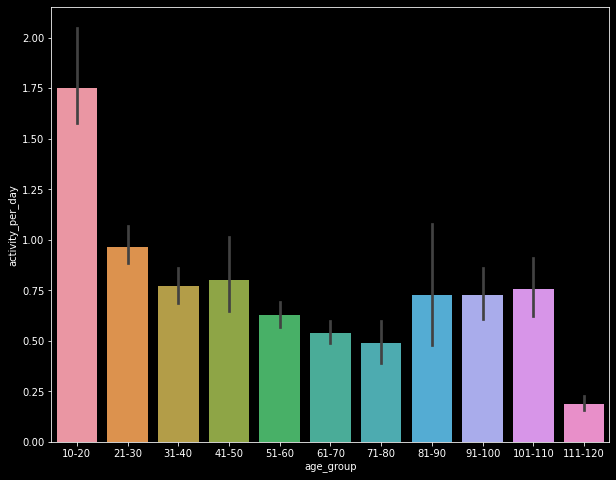

In [79]:
#  age group vs activity per day
fb_data_df['activity_per_day'] = (fb_data_df['friendships_initiated']/fb_data_df['tenure'] + fb_data_df['likes']/fb_data_df['tenure']).replace([np.nan, np.inf, -np.inf], 0)
plt.subplots(figsize = (10,8))
sns.barplot(data = fb_data_df,x = 'age_group',y = 'activity_per_day')
plt.show()

From above plot we can see that users in age group 10 - 20 are most active

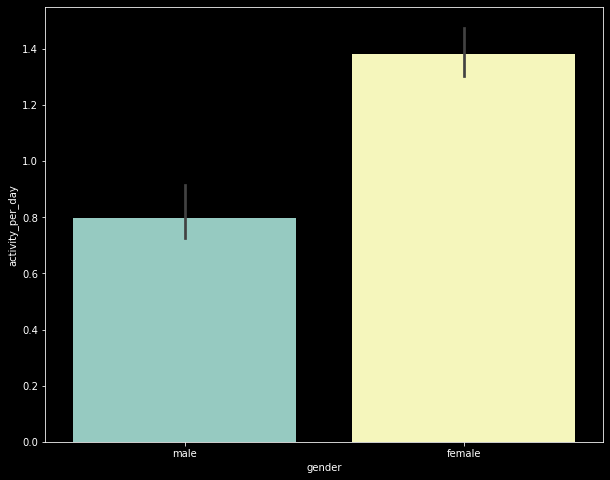

In [80]:
# gender vs activity per day barplot
plt.subplots(figsize = (10,8))
sns.barplot(data = fb_data_df,x = 'gender',y = 'activity_per_day')
plt.show()

From above barplot we can see that female users are far more active than male users

# Web users and mobile user analysis

In [81]:
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0


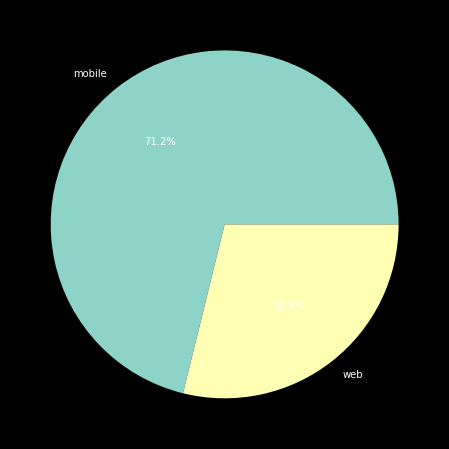

In [82]:
# first get all the active users
active_users = fb_data_df.query("friendships_initiated !=0 and likes != 0").reset_index(drop=True)
# get wich platform they are using
active_users['use_method'] = (active_users['mobile_likes'] >= active_users['www_likes']).replace({True : 'mobile', False : 'web'})

# plot it
plt.subplots(figsize = (10,8))
plt.pie(active_users['use_method'].value_counts(), labels = ['mobile','web'], autopct='%1.1f%%')
plt.show()

From above plot we can see that 71 % of facebook users use it from mobile

In [14]:
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20


### Likes and Friendships

In [83]:
#Most liked people
fb_data_df.sort_values(by='likes_received',ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day
94906,1674584,17,14,1996,8,female,401,818,395,1016,261197,659,131244,357,129953,10-20,1-2 years,3.518703
77121,1441676,20,5,1993,8,female,253,230,73,2078,178166,1982,138561,96,39605,10-20,0-1 year,8.501976
98822,1715925,23,4,1990,9,female,705,4077,793,1877,152014,80,89911,1797,62103,21-30,1-2 years,3.787234
98994,2063006,20,4,1993,1,female,402,1988,332,7351,106025,7248,73333,103,32692,10-20,1-2 years,19.111940
98878,1053087,23,6,1990,6,male,596,4320,836,2996,82623,179,43410,2817,39213,21-30,1-2 years,6.429530
49230,1432020,20,12,1993,1,male,245,79,50,477,53534,78,30387,399,23147,10-20,0-1 year,2.151020
98773,2042824,18,25,1995,1,male,51,4817,32,1346,52964,1342,18925,4,34039,10-20,0-1 year,27.019608
98937,1559908,20,4,1993,12,female,1334,4622,1819,4280,45633,472,30754,3808,14879,10-20,3-4 years,4.571964
98936,1781243,17,1,1996,5,female,976,3683,755,10478,42449,246,27353,10232,15096,10-20,2-3 years,11.509221
98686,1015907,74,27,1939,11,male,832,4630,831,966,39536,941,10199,25,29337,71-80,2-3 years,2.159856


In [84]:
#Calculating likes per day
fb_data_df['likes_per_day']=fb_data_df.likes_received/fb_data_df.tenure.where(fb_data_df.tenure>0)
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day,likes_per_day
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0,0.0
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0,0.0
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0,0.0
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0,0.0
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0,0.0


In [85]:
#Top 10 users getting highest likes received
fb_data_df.sort_values(by='likes_received',ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day,likes_per_day
94906,1674584,17,14,1996,8,female,401,818,395,1016,261197,659,131244,357,129953,10-20,1-2 years,3.518703,651.364090
77121,1441676,20,5,1993,8,female,253,230,73,2078,178166,1982,138561,96,39605,10-20,0-1 year,8.501976,704.213439
98822,1715925,23,4,1990,9,female,705,4077,793,1877,152014,80,89911,1797,62103,21-30,1-2 years,3.787234,215.622695
98994,2063006,20,4,1993,1,female,402,1988,332,7351,106025,7248,73333,103,32692,10-20,1-2 years,19.111940,263.743781
98878,1053087,23,6,1990,6,male,596,4320,836,2996,82623,179,43410,2817,39213,21-30,1-2 years,6.429530,138.629195
49230,1432020,20,12,1993,1,male,245,79,50,477,53534,78,30387,399,23147,10-20,0-1 year,2.151020,218.506122
98773,2042824,18,25,1995,1,male,51,4817,32,1346,52964,1342,18925,4,34039,10-20,0-1 year,27.019608,1038.509804
98937,1559908,20,4,1993,12,female,1334,4622,1819,4280,45633,472,30754,3808,14879,10-20,3-4 years,4.571964,34.207646
98936,1781243,17,1,1996,5,female,976,3683,755,10478,42449,246,27353,10232,15096,10-20,2-3 years,11.509221,43.492828
98686,1015907,74,27,1939,11,male,832,4630,831,966,39536,941,10199,25,29337,71-80,2-3 years,2.159856,47.519231


In [86]:
#Highest likes received per day
fb_data_df.sort_values(by='likes_per_day',ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day,likes_per_day
94996,1149300,24,7,1989,3,female,2,834,104,2169,5404,2169,1520,0,3884,21-30,0-1 year,1136.500000,2702.000000
94057,2175941,18,25,1995,2,male,2,640,299,5640,2542,4251,1587,1389,955,10-20,0-1 year,2969.500000,1271.000000
98773,2042824,18,25,1995,1,male,51,4817,32,1346,52964,1342,18925,4,34039,10-20,0-1 year,27.019608,1038.509804
77121,1441676,20,5,1993,8,female,253,230,73,2078,178166,1982,138561,96,39605,10-20,0-1 year,8.501976,704.213439
94906,1674584,17,14,1996,8,female,401,818,395,1016,261197,659,131244,357,129953,10-20,1-2 years,3.518703,651.364090
98999,1256153,18,12,1995,3,female,21,1968,1720,4401,13412,4399,10592,2,2820,10-20,0-1 year,291.476190,638.666667
61145,1409983,47,8,1966,10,female,4,123,61,3331,1200,3331,468,0,732,41-50,0-1 year,848.000000,300.000000
98994,2063006,20,4,1993,1,female,402,1988,332,7351,106025,7248,73333,103,32692,10-20,1-2 years,19.111940,263.743781
76025,1494406,17,1,1996,1,female,2,215,185,292,478,292,244,0,234,10-20,0-1 year,238.500000,239.000000
75126,1546811,39,11,1974,12,female,29,212,145,8091,6730,3181,2457,4910,4273,31-40,0-1 year,284.000000,232.068966


In [87]:
#Extracting famous people
famous=fb_data_df.sort_values(by='likes_per_day',ascending=False)[:10]
famous.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day,likes_per_day
94996,1149300,24,7,1989,3,female,2,834,104,2169,5404,2169,1520,0,3884,21-30,0-1 year,1136.500000,2702.000000
94057,2175941,18,25,1995,2,male,2,640,299,5640,2542,4251,1587,1389,955,10-20,0-1 year,2969.500000,1271.000000
98773,2042824,18,25,1995,1,male,51,4817,32,1346,52964,1342,18925,4,34039,10-20,0-1 year,27.019608,1038.509804
77121,1441676,20,5,1993,8,female,253,230,73,2078,178166,1982,138561,96,39605,10-20,0-1 year,8.501976,704.213439
94906,1674584,17,14,1996,8,female,401,818,395,1016,261197,659,131244,357,129953,10-20,1-2 years,3.518703,651.364090


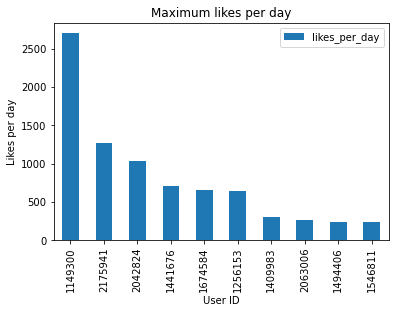

In [23]:
#plt.subplots(figsize=(12,10)
#plt.plot(y='userid',x='likes_per_day',data=famous)
famous.plot(x='userid',y='likes_per_day',kind='bar')
plt.ylabel("Likes per day")
plt.xlabel("User ID")
plt.title("Maximum likes per day")
plt.show()

In [88]:
#Getting those people who are most interested in sending friend requests
fb_data_df.sort_values(by='friendships_initiated',ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day,likes_per_day
98993,1654565,19,15,1994,8,male,394,4538,4144,4501,15088,4435,5961,66,9127,10-20,1-2 years,21.941624,38.294416
98842,1052695,22,23,1991,9,female,874,4297,3654,1968,2006,1825,1632,143,374,21-30,2-3 years,6.432494,2.295195
98675,1949247,19,9,1994,11,female,434,4189,3594,927,2859,528,1290,399,1569,10-20,1-2 years,10.417051,6.587558
98567,1205425,60,17,1953,6,female,1562,4794,3538,586,1318,560,960,26,358,51-60,4-5 years,2.640205,0.843790
98347,1403953,19,11,1994,11,male,519,3693,3415,170,20,170,19,0,1,10-20,1-2 years,6.907514,0.038536
98960,1745067,17,1,1996,1,female,947,4290,3238,3780,8185,1233,5380,2547,2805,10-20,2-3 years,7.410771,8.643083
98898,2010847,18,10,1995,2,female,1084,4509,3233,2672,2053,2009,1074,663,979,10-20,2-3 years,5.447417,1.893911
98949,1103175,15,24,1998,8,female,487,3661,3086,6815,6177,1500,3990,5315,2187,10-20,1-2 years,20.330595,12.683778
98685,1934087,19,19,1994,5,male,575,4516,3078,954,3075,834,2464,120,611,10-20,1-2 years,7.012174,5.347826
98835,1075221,22,23,1991,5,male,907,4693,3024,2028,948,1990,517,38,431,21-30,2-3 years,5.570011,1.045204


In [89]:
followers=fb_data_df.sort_values(by='friendships_initiated',ascending=False)[:10]

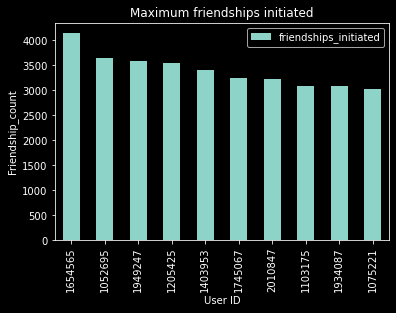

In [90]:
#plt.subplots(figsize=(12,10)
#plt.plot(y='userid',x='likes_per_day',data=famous)
followers.plot(x='userid',y='friendships_initiated',kind='bar')
plt.ylabel("Friendship_count")
plt.xlabel("User ID")
plt.title("Maximum friendships initiated")
plt.show()

In [91]:
followers['fc_per_day']=followers.friendships_initiated / followers.tenure
followers

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day,likes_per_day,fc_per_day
98993,1654565,19,15,1994,8,male,394,4538,4144,4501,15088,4435,5961,66,9127,10-20,1-2 years,21.941624,38.294416,10.517766
98842,1052695,22,23,1991,9,female,874,4297,3654,1968,2006,1825,1632,143,374,21-30,2-3 years,6.432494,2.295195,4.180778
98675,1949247,19,9,1994,11,female,434,4189,3594,927,2859,528,1290,399,1569,10-20,1-2 years,10.417051,6.587558,8.281106
98567,1205425,60,17,1953,6,female,1562,4794,3538,586,1318,560,960,26,358,51-60,4-5 years,2.640205,0.843790,2.265045
98347,1403953,19,11,1994,11,male,519,3693,3415,170,20,170,19,0,1,10-20,1-2 years,6.907514,0.038536,6.579961
98960,1745067,17,1,1996,1,female,947,4290,3238,3780,8185,1233,5380,2547,2805,10-20,2-3 years,7.410771,8.643083,3.419219
98898,2010847,18,10,1995,2,female,1084,4509,3233,2672,2053,2009,1074,663,979,10-20,2-3 years,5.447417,1.893911,2.982472
98949,1103175,15,24,1998,8,female,487,3661,3086,6815,6177,1500,3990,5315,2187,10-20,1-2 years,20.330595,12.683778,6.336756
98685,1934087,19,19,1994,5,male,575,4516,3078,954,3075,834,2464,120,611,10-20,1-2 years,7.012174,5.347826,5.353043
98835,1075221,22,23,1991,5,male,907,4693,3024,2028,948,1990,517,38,431,21-30,2-3 years,5.570011,1.045204,3.334068


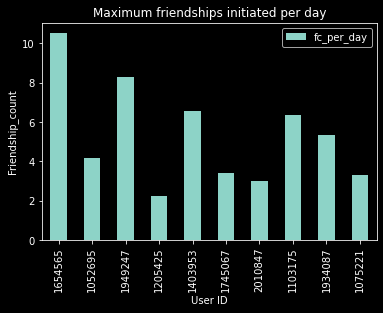

In [92]:
#plt.subplots(figsize=(12,10)
#plt.plot(y='userid',x='likes_per_day',data=famous)
followers.plot(x='userid',y='fc_per_day',kind='bar')
plt.ylabel("Friendship_count")
plt.xlabel("User ID")
plt.title('Maximum friendships initiated per day')
plt.show()

### Which age among the 10-20 age group has highest number of likes received?

In [93]:
df1=fb_data_df[(fb_data_df['age']>=10)&(fb_data_df['age']<=20)]
df1.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day,likes_per_day
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0,0.0
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0,0.0
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0,0.0
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0,0.0
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0,0.0


<AxesSubplot:xlabel='count', ylabel='age'>

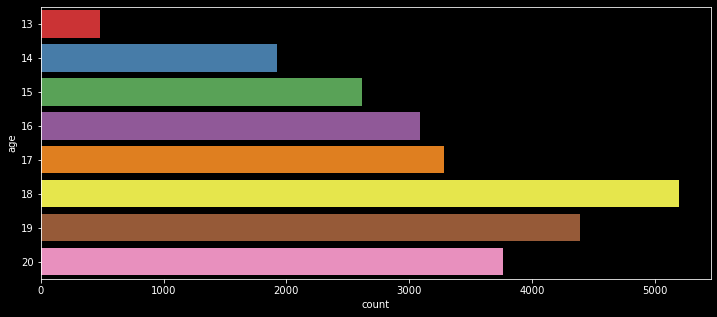

In [94]:
plt.figure(figsize=(12,5))
sns.countplot(y='age',data=df1,palette='Set1')

In [95]:
df2=fb_data_df[fb_data_df['age']==18]
df2.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day,likes_per_day
153,1590837,18,30,1995,11,male,587,0,0,0,0,0,0,0,0,10-20,1-2 years,0.0,0.0
154,1124403,18,13,1995,11,male,577,0,0,0,0,0,0,0,0,10-20,1-2 years,0.0,0.0
155,1364002,18,27,1995,11,male,80,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0,0.0
156,2113653,18,4,1995,11,female,15,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0,0.0
157,1331161,18,27,1995,12,male,715,0,0,0,0,0,0,0,0,10-20,1-2 years,0.0,0.0


<AxesSubplot:xlabel='gender', ylabel='likes_received'>

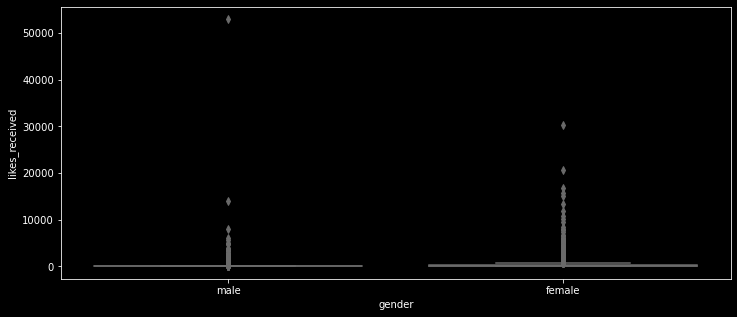

In [96]:
plt.figure(figsize=(12,5))
sns.boxplot(y='likes_received',x='gender',data=df2)

In [97]:
df3=df2[df2['likes_received']==df2['likes_received'].max()]
df3[['age','gender','friend_count','likes_received']]

,age,gender,friend_count,likes_received
98773,18,male,4817,52964


##### Male has an outlier which shows the person has highest number of likes received.